In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
import csv
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

2023-12-13 18:53:17.541265: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read the balanced DataFrame
balanced_df = pd.read_csv('data/balanced_data.csv')

# Directory containing the images
image_dir = 'data/test/'  # Update with your image directory

# Data generator for test images
test_datagen = ImageDataGenerator(rescale=1. / 255)  # Normalizing pixel values

# Parameters for image generator
batch_size = 32
target_size = (64, 64)  # Resize images to 64x64

# Generating data flow from DataFrame
test_generator = test_datagen.flow_from_dataframe(
    dataframe=balanced_df,
    directory=image_dir,
    x_col='filename',
    y_col='label_column',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  # Change this based on your problem type
    shuffle=False  # To ensure the order remains the same for confusion matrix
)

# Load your pre-trained model
classifier = load_model('isl_classifier_26_classes_sgd_epoch25.h5')  # Replace 'your_model.h5' with your model file

# Generate predictions using the generator
num_samples = balanced_df.shape[0]
num_steps = num_samples // batch_size

predicted_labels = classifier.predict(test_generator, steps=num_steps, verbose=1)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Get true labels
true_labels = test_generator.classes[:num_steps * batch_size]


Found 1040 validated image filenames belonging to 26 classes.


2023-12-13 18:53:20.713571: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-12-13 18:53:21.034103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 4s 115ms/step


In [3]:
print(classifier)
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

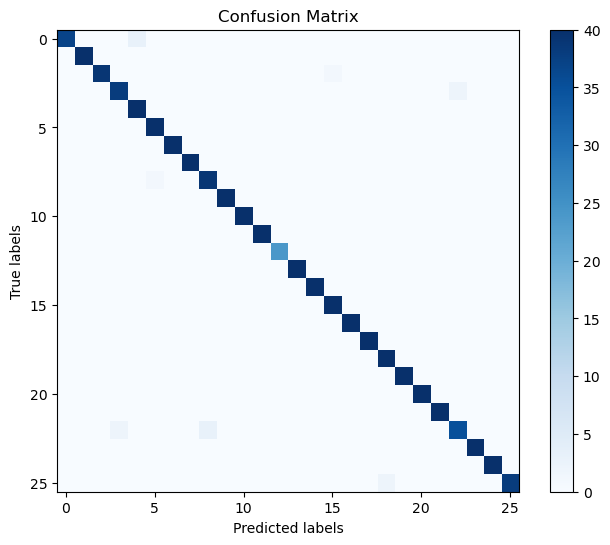

In [4]:

y_pred = predicted_labels
y_pred_classes = predicted_classes

y_true = true_labels

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Display the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)


# Display the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [5]:

# Precision, Recall, and F1-Score for each class
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       1.00      1.00      1.00        40
           2       1.00      0.97      0.99        40
           3       0.95      0.95      0.95        40
           4       0.93      1.00      0.96        40
           5       0.98      1.00      0.99        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       0.93      0.97      0.95        40
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        40
          14       1.00      1.00      1.00        40
          15       0.98      1.00      0.99        40
          16       1.00      1.00      1.00        40
    

In [6]:
import json

# To load the history
with open('isl_classifier_26_classes_sgd_epoch25.json', 'r') as f:
    classifier = json.load(f)

# Access loaded history
# loaded_train_accuracy = loaded_history['accuracy']
# loaded_test_accuracy = loaded_history['val_accuracy']

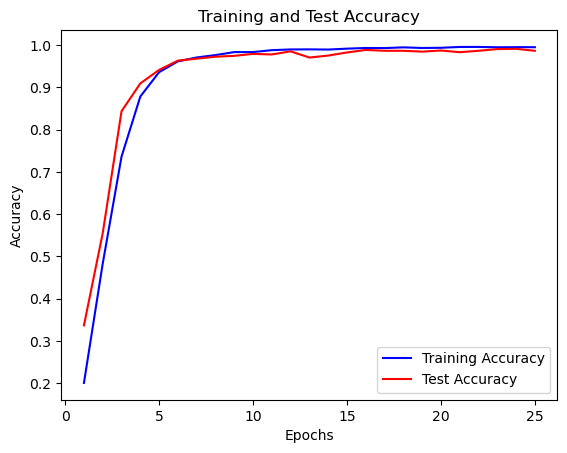

In [7]:

# Train accuracy vs test accuracy
# train_accuracy = classifier.history['accuracy']
# test_accuracy = classifier.history['val_accuracy']
train_accuracy = classifier['accuracy']
test_accuracy = classifier['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


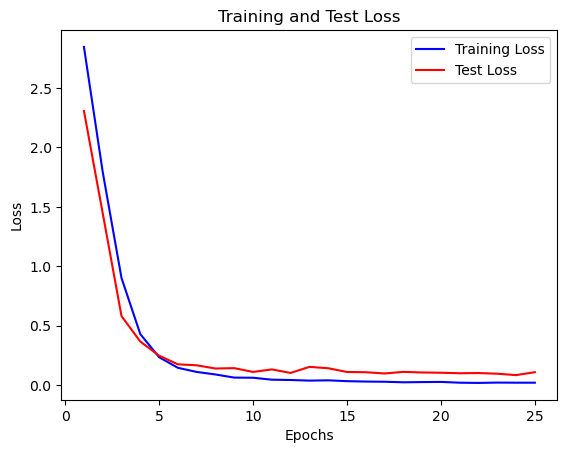

In [8]:
# Model Loss per epoch
train_loss = classifier['loss']
test_loss = classifier['val_loss']

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       1.00      1.00      1.00        40
           2       1.00      0.97      0.99        40
           3       0.95      0.95      0.95        40
           4       0.93      1.00      0.96        40
           5       0.98      1.00      0.99        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       0.93      0.97      0.95        40
           9       1.00      1.00      1.00        40
          10       1.00      1.00      1.00        40
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        40
          14       1.00      1.00      1.00        40
          15       0.98      1.00      0.99        40
          16       1.00      1.00      1.00        40
    

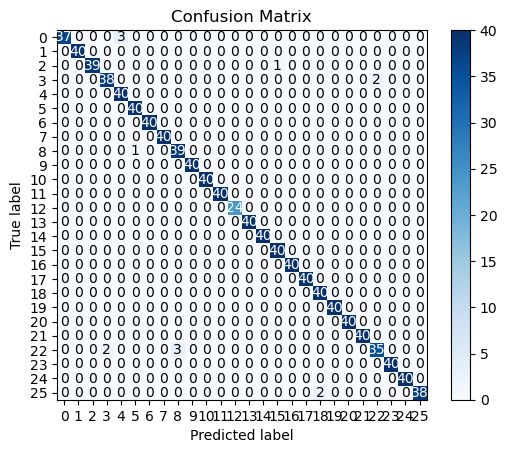

In [9]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Create confusion matrix
class_names = np.unique(y_true)
cm = confusion_matrix(y_true, y_pred_classes, labels=class_names)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Display the values on each tile
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.show()

In [10]:
alphabet_dict = {
    0.0: 'A',
    1.0: 'B',
    2.0: 'C',
    3.0: 'D',
    4.0: 'E',
    5.0: 'F',
    6.0: 'G',
    7.0: 'H',
    8.0: 'I',
    9.0: 'J',
    10.0: 'K',
    11.0: 'L',
    12.0: 'M',
    13.0: 'N',
    14.0: 'O',
    15.0: 'P',
    16.0: 'Q',
    17.0: 'R',
    18.0: 'S',
    19.0: 'T',
    20.0: 'U',
    21.0: 'V',
    22.0: 'W',
    23.0: 'X',
    24.0: 'Y',
    25.0: 'Z'
}

Classification Report:


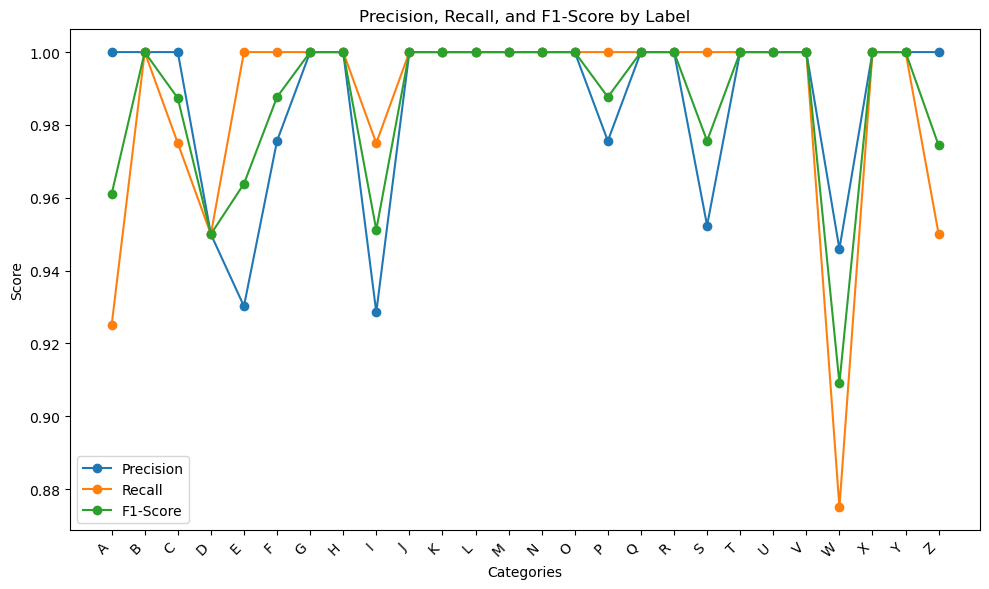

In [11]:
print("Classification Report:")
report = classification_report(y_true, y_pred_classes, output_dict=True)

# Extract values for plotting
categories = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]

categories_labels = [alphabet_dict[float(category)] for category in categories]

# Create linear graph
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(categories_labels, precision, marker='o', label='Precision')
ax.plot(categories_labels, recall, marker='o', label='Recall')
ax.plot(categories_labels, f1_score, marker='o', label='F1-Score')

ax.set_xlabel('Categories')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score by Label')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
print(y_true)

[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7